# Agrupación de datos cuantitativos

*(ver Tema 9 de curso de R-basic)*

# 1 Introducción 

En estadística, existen innumerables motivos por los cuales nos interesa agrupar los datos cuando estos son cuantitativos. Uno de estos motivos puede ser perfectamente que los datos sean muy heterogéneos. En este caso, nos encontraríamos con que las frecuencias de los valores individuales serían todas muy similares, lo que daría lugar a un diagrama de barras muy difícil de interpretar, tal y como mostramos en el siguiente ejemplo.

Otro de los motivos por el que necesitamos muchas veces agrupar los datos cuantitativos es porque, la precisión infinita no existe. 
Por tanto, esta imposibilidad de medir de manera exacta muchas de las magnitudes continuas (tiempo, peso, altura...) nos obliga a trabajar con aproximaciones o redondeos de valores reales y que cada uno de estos represente todo un intervalo de posibles valores.
Por lo general, existen 3 situaciones en las cuales conviene sin lugar a dudas agrupar datos cuantitativos en intervalos, también llamados ***clases***.

- Cuando los datos son continuos, su redondeo ya define un agrupamiento debido a la inexistencia de precisión infinita
- Cuando los datos son discretos, pero con un número considerablemente grande de posibles valores
- Cuando tenemos muchísimos datos y estamos interesados en estudiar las frecuencias de sus valores



# 2 Cómo agrupar

## Los 4 pasos

Antes de estudiar unos datos agrupados, hay que, obviamente, agruparlos. Este proceso consta de 4 pasos:

1. Decidir el número de intervalos que vamos a utilizar
2. Decidir la amplitud de estos intervalos
3. Acumular los extremos de los intervalos
4. Calcular el valor representativo de cada intervalo, su **marca de clase**

No hay una forma de agrupar datos mejor que otra. Eso sí, cada uno de los diferentes agrupamientos para un conjunto de datos podría sacar a la luz características diferentes del conjunto.

## Estableciendo el número de clases

En este tema explicaremos una receta para agrupar datos. Lo dicho, ni mejor ni peor que el resto.

Lo primero es establecer el número $k$ de clases en las que vamos a dividir nuestros datos. Podemos decidir en función de nuestros intereses o podemos hacer uso de alguna de las reglas existentes. Destacaremos las más populares. Sea $n$ el número total de datos de la muestra

- **Regla de la raíz cuadrada**: $k = \lceil\sqrt{n}\ \rceil$
- **Regla de Sturges**: $k = \lceil 1+\log_{2}(n)\rceil$
- **Regla de Scott**: Se determina primero la **amplitud teórica<**, $A_S$ de las clases $$A_S = 3.5\cdot\tilde{s}\cdot n^{-\frac{1}{3}}$$

donde $\tilde{s}$ es la desviación típica muestral. Luego se toma $$k = \left\lceil \frac{\max(x)-\min(x)}{A_S}\right\rceil$$

- **Regla de Freedman-Diaconis**: Se determina primero la **amplitud teórica**, $A_{FD}$ de las clases $$A_{FD} = 2\cdot(Q_{0.75}-Q_{0.25})\cdot n^{-\frac{1}{3}}$$ (donde, recordemos, $Q_{0.75}-Q_{0.25}$, es el rango intercuantílico) y entonces 
$$k = \left\lceil \frac{\max(x)-\min(x)}{A_{FD}}\right\rceil$$

Si os fijáis, las dos primeras solo dependen de $n$, mientras que las dos últimas también tienen en cuenta, de formas diferentes, la dispersión de los datos. De nuevo, no hay ninguna mejor que las demás. Pero sí puede ocurrir que métodos diferentes den lugar a la observación de características diferentes en los datos.

## Decidiendo la amplitud

Una vez determinado $k$, hay que decidir su amplitud. 

La forma más fácil y la que nosotros utilizaremos por defecto es que la amplitud de todos los intervalos sea la misma, $A$. Esta forma no es la única.

Para calcular $A$, lo que haremos será dividir el rango de los datos entre $k$, el número de clases, y redondearemos por exceso a un valor de la precisión de la medida.

Si se da el improbable caso en que el cociente de exacto, tomaremos como $A$ ese cociente más una unidad de precisión.

## Extremos de los intervalos

Es la hora de calcular los extremos de los intervalos. Nosotros tomaremos estos intervalos siempre cerrados por su izquierda y abiertos por la derecha, debido a que esta es la forma en que R los construye y porque es así como se utilizan en Teoría de Probabilidades al definir la distribución de una variable aleatoria discreta y también en otras muchas situaciones cotidianas.

Utilizaremos la siguiente notación
$$[L_1,L_2),[L_2,L_3),\dots,[L_k,L_{k+1})$$

donde los $L_i$ denotan los extremos de los intervalos. Estos se calculan de la siguiente forma:

$$L_1 = \min(x)-\frac{1}{2}\cdot \text{precisión}$$
A partir de $L_1$, el resto de intervalos se obtiene de forma recursiva:
$$L_2 = L_1 + A$$
$$L_3 = L_2 + A$$
$$\vdots$$
$$L_{k+1} = L_k+A$$

Si nos fijamos bien, los extremos forman una progresión aritmética de salto $A$: $$L_{i} = L_{1}+(i-1)A,\qquad i=2,\dots,k+1$$

De esta forma garantizamos que los extremos de los intervalos nunca coincidan con valores del conjunto de datos, puesto que tinen una precisión mayor.

## Marca de clase

Solo nos queda determinar la **marca de clase**, $X_i$, de cada intervalo $[L_i,L_{i+1})$.

Este no es más que un valor del intervalo que utilizaremos para identificar la clase y para calcular algunos estadísticos.

Genralmente, $$X_i = \frac{L_i+L_{i+1}}{2}$$ es decir, $X_i$ será el punto medio del intervalo, para así garantizar que el error máximo cometido al describir cualquier elemento del intervalo por medio de su marca de clase sea mínimo o igual a la mitad de la amplitud del respectivo intervalo.

Es sencillo concluir que, al tener todos los intervalos amplitud $A$, la distancia entre $X_i$ y $X_{i+1}$ tambien será $A$. Por consiguiente,

 $$X_{i} = X_1+ (i-1)A,\qquad i=2,\dots,k$$
 
 donde $$X_1 = \frac{L_1+L_2}{2}$$

# 3 Estadísticos para datos agrupados

Al tener una muestra de datos numéricos, conviene calcular los **estadísticos** antes de realizar los agrupamientos, puesto que de lo contrario podemos perder información.

No obstante, hay situaciones en que los datos los obtenemos ya agrupados. En estos casos, aún sigue siendo posible calcular los estadísticos y utilizarlos como aproximaciones de los estadísticos de los datos "reales", los cuales no conocemos.

La *media* $\bar{x}$, la *varianza*, $s^2$, la *varianza muestral*, $\tilde{s}^2$, la *desviación típica*, $s$, y la *desviación típica muestral*, $\tilde{s}$ de un conjunto de datos agrupados se calculan mediante las mismas fórmulas que para los datos no agrupados con la única diferencia de que sustituimos cada clase por su marca de clase y la contamos con su frecuencia.

Es decir, si tenemos $k$ clases, con sus respectivas marcas $X_1,\dots,X_k$ con frecuencias absolutas $n_1,\dots,n_k$ de forma que $n=\sum_{j=1}^kn_j$. Entonces

$$\bar{x}=\frac{\sum_{j=1}^kn_jX_j}{n},\quad s^2=\frac{\sum_{j=1}^kn_jX_j^2}{n}-\bar{x}^2,\quad \tilde{s}^2=\frac{n}{n-1}\cdot s^2$$ $$s=\sqrt{s^2},\quad \tilde{s}=\sqrt{\tilde{s}^2}$$

## Intervalo modal

En lo referente a la moda, esta se sustituye por el **intervalo modal**, que es la clase con mayor frecuencia (absoluta o relativa, tanto da).

En el caso en que un valor numérico fuera necesario, se tomaría su marca de clase.

## Intervalo crítico para la mediana

Se conoce como **intervalo crítico para la mediana**, $[L_c,L_{c+1})$, al primer intervalo donde la frecuencia relativa acumulada sea mayor o igual que 0.5

Denotemos por $n_c$ su frecuencia absoluta, por $A_c = L_{c+1}-L_c$ su amplitud y por $N_{c-1}$ la frecuencia acumalada del intervalo inmediantamente anterior (en caso de ser $[L_c,L_{c+1})=[L_1,L_2)$, entonces $N_{c-1}=0$). Entonces, $M$ será una aproximación para la mediana de los datos "reales" a partir de los agrupados

$$M = L_c +A_c\cdot\frac{\frac{n}{2}-N_{c-1}}{n_c}$$

## Aproximación de los cuantiles

La fórmula anterior nos permite aproximar el cuantil $Q_p$ de los datos "reales" a partir de los datos agrupados:

$$Q_p = L_p +A_p\cdot\frac{p\cdot n-N_{p-1}}{n_p}$$

donde el intervalo $[L_p,L_{p+1})$ denota el primer intervalo cuya frecuencia relativa acumulada es mayor o igual a $p$

# 4 Histogramas

La mejor manera de representar datos agrupados es mediante unos diagramas de barras especiales conocidos como **histogramas**.

En ellos se dibuja sobre cada clase una barra cuya área representa su frecuencia. Podéis comprobar que el producto de la base por la altura de cada barra es igual a la frecuencia de la clase correspondiente.

## El uso de histogramas

Si todas las clases tienen la misma amplitud, las alturas de estas barras son proporcionales a las frecuencias de sus clases, con lo cual podemos marcar sin ningún problema las frecuencias sobre el eje vertical. Pero si las amplitudes de las clases no son iguales, las alturas de las barras en un histograma no representan correctamente las frecuencias de las clases.

En este último caso, las alturas de las barras son las necesarias para que el área de cada barra sea igual a la frecuencia de la clase correspondiente y como las bases son de amplitudes diferentes, estas alturas no son proporcionales a las frecuencias de las clases, por lo que no tiene sentido marcar las frecuencias en el eje vertical

## El uso de histogramas

Los histogramas también son utilizados para representar frecuencias acumuladas de datos agrupados. En este caso, las alturas representan las frecuencias independientemente de la base debido a que éstas deben ir creciendo.

## Interpretación de los histogramas

El eje de las abcisas representa los datos. Aquí marcamos los extremos de las clases y se dibuja una barra sobre cada una de ellas. Esta barra tiene significados diferentes en función del tipo de histograma, pero en general representa la frecuencia de su clase

- **Histograma de frecuencias absolutas**: la altura de cada barra es la necesaria para que el área de la barra sea igual a la frecuencia absoluta de la clase. Las amplitudes de las clases pueden ser todas iguales o no. En el primer caso, las alturas son proporcionales a las frecuencias. En el segundo caso, no existe tal proporcionalidad. De todas formas, sea cual sea el caso, conviene indicar de alguna forma la frecuencia que representa cada barra.
- **Histograma de frecuencias relativas**: la altura, **densidad**, de cada barra es la necesaria para que el área sea igual a la frecuencia relativa de la clase. La suma de todas las áreas debe ser 1. De nuevo, conviene indicar de alguna forma la frecuencia que representa cada barra.
- **Histogramas de frecuencias acumuladas**: las alturas de las barras son iguales a las frecuencias acumuladas de las clases, independientemente de su amplitud.

## Frecuencias nulas

No es conveniente que en un histograma aparezcan clases con frecuencia nula, exceptuando el caso en que represente poblaciones muy diferentes y separadas sin individuos intermedios.

Si apareciesen clases vacías, convendría utilizar un número menor de clases, o bien unir las clases vacías con alguna de sus adyacentes. De este último modo romperíamos nuestro modo de trabajar con clases de la misma amplitud.
## Histogramas de frecuencias relativas

En estos histogramas, es común superponer una curva que estime la densidad de la distribución de la variable cuantitativa definida por la característica que estamos midiendo.

La <l class = "definition">densidad</l> de una variable es una curva cuya área comprendida entre el eje de las abcisas y la propia curva sobre un intervalo es igual a la fracción de individuos de la población que caen dentro de ese intervalo.

Para hacernos una idea visual, imaginad que vais aumentando el tamaño de la muestra a la vez que agrupáis los datos en un conjunto cada vez mayor de clases. Si el rango de los datos se mantiene constante, la amplitud de las clases del histograma irá menguando. Además, cuando $n$, el tamaño de la muestra, tiende a infinito, los intervalos tienden a ser puntos y, a su vez, las barras tienden a ser líneas verticales. Pues bien, los extremos superiores de estas líneas serán los que dibujen la densidad de la variable.

## Campana de Gauss

Es la densidad más famosa: la [Campana de Gauss](https://es.wikipedia.org/wiki/Función_gaussiana) Ésta se corresponde con una variable que siga una distribución nomal.

La forma de la campana depende de dos parámetros: el valor medio, $\mu$, y su desviación típica, $\sigma$.

<img src="img/gauss.jpg" width="500">


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([5., 7., 2., 6., 6., 6., 8., 6., 6., 8.]),
 array([  149. , 10068.7, 19988.4, 29908.1, 39827.8, 49747.5, 59667.2,
        69586.9, 79506.6, 89426.3, 99346. ]),
 <a list of 10 Patch objects>)

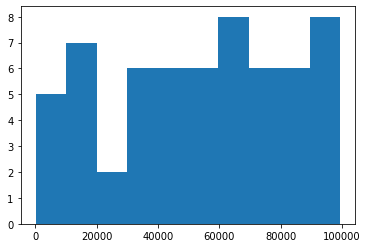

In [3]:
# Generar números aleatorios
import random
random.seed(0)
A= (random.sample(range(100000), 60))

plt.hist(A)